In [1]:
# importing the necessary modules
using Plots;
using Printf

In [2]:
# calculate the closest centroid
function calc_closest(c1,c2)
    centroid = []
    for i in 1:size(data)[1]
        d1 = sqrt(((c1[1] - data[i,1])^2) * ((c1[2] - data[i,2])^2));
        d2 = sqrt(((c2[1] - data[i,1])^2) * ((c2[2] - data[i,2])^2));
        if d1 >= d2
            push!(centroid,2);
        else
            push!(centroid,1);
        end
    end;
    global data;
    if size(data)[2] > 2
        data[:,3] = centroid;
    else 
        data = [data centroid];
    end;
end;

In [3]:
# calculate center of the points
function update_c2(c1,c2)
    c1_pts_x = 0
    c2_pts_x = 0
    
    c1_count = 0
    c2_count = 0
    
    c1_pts_y = 0
    c2_pts_y = 0
    for i in 1:size(data)[1]
        if data[i,3] == 1
            c1_pts_x += data[i,1];
            c1_pts_y += data[i,2];
            c1_count += 1;
        else
            c2_pts_x += data[i,1];
            c2_pts_y += data[i,2];
            c2_count += 1;
        end;
    end;
    global c1;
    global c2;
    c1[1] = c1_pts_x/c1_count;
    c1[2] = c1_pts_y/c1_count;
    c2[1] = c2_pts_x/c2_count;
    c2[2] = c2_pts_y/c2_count;
end;

In [4]:
# dataset

# x co-ordinates
x_1 = [Float64(i) for i in 1:10] + rand(-2:2,10);
x_2 = [Float64(i) for i in 25:41] + rand(-3:3,17);
x = reshape([x_1;x_2],length(x_1)+length(x_2))

# y co-ordinates
y_1 = [Float64(rand(2:6)) for i in 1:10];
y_2 = [Float64(rand(15:21)) for i in 1:17];
y = reshape([y_1;y_2],length(y_1)+length(y_2));

data = [x y];

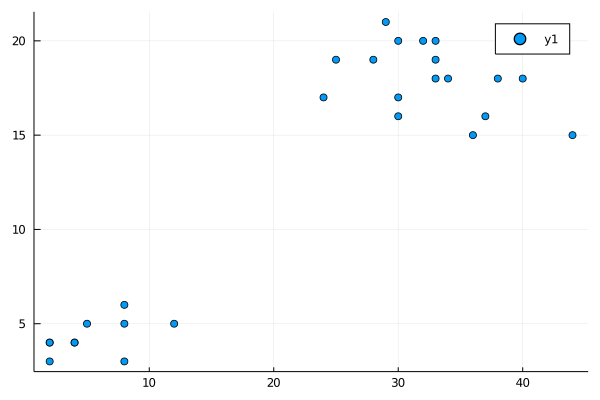

In [5]:
# plotting the data ( before clustering )
plot(data[:,1],data[:,2],seriestype="scatter")

In [6]:
# initialize centroids
r1 = rand(1:size(data)[1],1);
r2 = rand(1:size(data)[1],1);
c1 = data[r1,:];
c2 = data[r2,:];

In [7]:
@printf("Intitial centroid values : \n")
println(c1,c2);

Intitial centroid values : 
[24.0 17.0][8.0 5.0]


In [ ]:
# K means clustering
i = 0
while true
    prev_c1 = c1;
    prev_c2 = c2;
    # calculate the closest centroid
    calc_closest(c1,c2);
    # update center of points
    update_c2(c1,c2)
    if (prev_c1 == c1 && prev_c2 == c2)
       break; 
    end;
end;

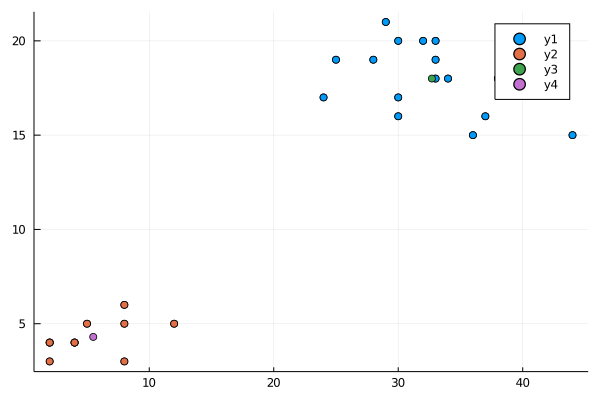

In [9]:
# plotting the data ( after clustering )  
plot!(data[:,1],data[:,2],seriestype="scatter",color=data[:,3])
plot!([c1[1]],[c1[2]],seriestype="scatter")
plot!([c2[1]],[c2[2]],seriestype="scatter")

In [10]:
@printf("Final centroid values \n");
println(c1,c2);

Final centroid values 
[32.705882352941174 18.0][5.5 4.3]
